In [2]:
170405

170405

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Tarefa 3 - Neural Networks
Third assessed coursework for the course: Técnicas e Algoritmos em Ciência de Dados

This tarefa provides an exciting opportunity for students to put their knowledge acquired in class into practice, using neural networks to solve real-world problems in both classification and regression. Students will apply the concepts they have learned to build, train, and optimize neural networks, using a validation set to fine-tune hyperparameters. Students will also get used to generating important plots during training to analyse the models' behaviour. By the end of the project, students will have gained hands-on experience in implementing neural networks.

## General guidelines:

* This work must be entirely original. You are allowed to research documentation for specific libraries, but copying solutions from the internet or your classmates is strictly prohibited. Any such actions will result in a deduction of points for the coursework.
* Please enter your code in the designated areas of the notebook. You can create additional code cells to experiment with, but __make sure to place your final solutions where they are requested in the notebook.__
* Before submitting your work, make sure to rename the file to the random number that you created for the previous coursework (for example, 289479.ipynb).

## Notebook Overview:

1. [Regression](#Regression) (50%)
2. [Classification](#Classification) (50%)

# Regression

**Download from ECLASS**
- Tarefa_3_template.ipynb
- energy_efficiency.csv

**Dataset and Problem Description**

In this exercise, you will use the Energy Efficiency Prediction dataset. This dataset contains information about the energy efficiency of buildings based on eight features, including the size of the building, the orientation, and the type of building materials used. The dataset includes two targets: heating load and cooling load, which represent the energy required to heat and cool the building, respectively.

This dataset is useful for building neural networks that predict the energy efficiency of buildings, which is an important problem in the field of sustainable energy. The dataset has been used in several machine learning research papers and provides a challenging regression problem.

**Exercise Description: Energy Efficiency Prediction with Neural Networks**

In this exercise, you will use the Energy Efficiency Prediction dataset provided.
You will build and train a neural network to predict the heating load (column labelled y1 in the dataset) and the cooling load (column labelled y2) of a building based on its energy efficiency features. 


### To complete this exercise, you will write code to build and train neural networks for this problem:

1. Split the dataset into training, validation, and test sets, using a 70:15:15 ratio.

2. Use numpy, build a neural network that takes the energy efficiency features as input and predicts the heating and the cooling load as outputs. You will choose the number of neurons per layers and the number of layers, but each layer will have the same number of neurons. These two values must be input parameters for your neural network. That is, you can’t hard-code each layer, meaning that you will have to write code that is able to work with a variable number of layers and neurons. 

3. Code the forward pass and backpropagation algorithm to learn the weights of the neural network. Use the training set to train the neural network and update the weights using stochastic gradient descent. For the hidden layers use the sigmoid activation function. You will need to regularize your neural network using weight decay, that is, you will include a regularization term in your error function.

4. Monitor the training by plotting the training and validation losses across the epochs. 

The performance of your neural network will be different depending on the number of layers, number of neurons per layer and the value of λ that controls the amount of weight decay. You will experiment with 3 values of λ: 0 (no weight decay), 0.001 and 0.0001.
To choose the best network configuration and assess its performance you will:

1. Choose 3 possible values of number hidden layers (for example, 1 to 3) and 3 different values of neurons per layer (for example, 100, 200, and 300), but you can also choose different values. 

2. Calculate the loss for each configuration on the validation set.

3. Generate 3 heatmaps, one for each value of the λ regularization parameter, displaying the loss on the validation set by plotting the number of layers and number of neurons in a grid. This will help you visualise the best configuration for the neural network. 

4. Train your final model selecting the best combination of hyper-parameters and evaluate the final performance of the neural network using the test set and the root mean squared error as the metric and report that.

**Important:**
- Train for 50 epochs.
- Set the learning rate η to 0.01.


In [120]:
## your code goes here:

# PREPARANDO OS DADOS

# Carregando os dados
data = pd.read_csv("energy_efficiency.csv").to_numpy()

# Separando as features dos rótulos
X = data[:, :-2]
y = data[:, -2:]

# Separando os dados
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X, y, test_size = 0.15)
X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, test_size = 3/17)

In [4]:
# FUNÇÕES PARA A REDE NEURAL DE REGRESSÃO

# Função da ativação sigmoidal
def sigmoid_activation(z):
    # Calculando o valor da sigmoide
    return 1/(1 + np.exp(-np.float64(z)))


# Função da derivada da sigmoide
def sigmoid_derivative(z):
    # Calculando o valor da derivada
    return sigmoid_activation(z)*(1-sigmoid_activation(z))


# Função para calcular o RMSE
def rmse(y_true, y_pred, Ws_list = []):
    # Se forem passados os pesos...
    if Ws_list:
        # Inicializa o erro da parte da regularização
        weights_error = 0
        # Para cada matriz de pesos...
        for W in Ws_list:
            # Soma ao erro a soma dos quadrados dos pesos
            weights_error += np.sum(W**2)
        # Retorna a soma do RMSE com o termo de regularização
        return np.sqrt(((y_pred - y_true)**2).mean()) + weights_error
    # Se não, retorna apenas o RMSE
    else:
        return np.sqrt(((y_pred - y_true)**2).mean())


# Função para inicializar a rede neural, retornando suas matrizes de pesos
def init_regression_neural_network(dim_input, n_of_hidden_layers, n_of_neurons, dim_output):
    # Lista para armazenar as matrizes de pesos
    weight_matrices = []

    # Primeira matriz de pesos, cujas dimensões dependem da dimensão do input da rede
    first_W = np.random.normal(0, 1, (dim_input + 1, n_of_neurons))
    weight_matrices.append(first_W)

    # Para cada matriz de pesos que leva de uma camada oculta a outra...
    for layer in range(n_of_hidden_layers - 1):
        # Inicializa a matriz aleatoriamente e insere na lista
        hidden_to_hidden_W = np.random.normal(0, 3, (n_of_neurons + 1, n_of_neurons))
        weight_matrices.append(hidden_to_hidden_W)

    # Última matriz de pesos, cujas dimensões dependem da dimensão do output da rede
    last_W = np.random.normal(0, 0.01, (n_of_neurons + 1, dim_output))
    weight_matrices.append(last_W)

    return weight_matrices


# Função do forward pass para regressão
def regression_forward_pass(X, Ws_list, activation):
    
    # Lista para armazenar as camadas antes das ativações
    layers_before_activation = []
    # Lista para armazenar as camadas após as ativações e com o bias já inserido
    activated_layers_with_bias = []

    # Camada atual de entrada na matriz de pesos
    current_input_layer = X
    
    # Para cada matriz de pesos...
    for W in Ws_list:
        # Adiciona a coluna do bias à camada de entrada
        if np.ndim(current_input_layer) == 1:
            current_input_layer = np.insert(current_input_layer, 0, 1)
        else:
            current_input_layer = np.insert(current_input_layer, 0, 1, axis = 1)

        # Adiciona essa camada à lista de camadas ativadas com bias
        activated_layers_with_bias.append(current_input_layer)

        # Calcula a saída dessa iteração
        current_output_layer = current_input_layer @ W
        # Adiciona ele na lista de camadas antes da ativação
        layers_before_activation.append(current_output_layer)

        # Ativando essa camada e setando ela como a nova camada de input
        activated_current_output_layer = activation(current_output_layer)
        current_input_layer = activated_current_output_layer

    return layers_before_activation, activated_layers_with_bias


# Função do backpropagation para regressão
def regression_backpropagation(layers_before_activation, activated_layers_with_bias, Ws_list, y_true, activation_derivative, lbda):

    # Lista para armazenar os gradientes
    gradients = []

    # Calculando os gradientes dos pesos da última camada
    delta = (layers_before_activation[-1] - y_true).reshape((1, -1))
    W_output_gradient = (activated_layers_with_bias[-1].reshape((-1, 1)) @ delta) + lbda*Ws_list[-1]
    # Adicionando-o na lista de gradientes
    gradients.append(W_output_gradient)

    # Para cada matriz de pesos antes da última...
    for i in range(len(Ws_list) - 2, -1, -1):
        # Calcula o delta da camada atual com base no delta da camada seguinte
        delta = activation_derivative(layers_before_activation[i]) * (delta.reshape((1, -1)) @ Ws_list[i + 1][1:, :].T)
        # Calcula seu gradiente
        gradient = activated_layers_with_bias[i].reshape((-1, 1)) @ delta + lbda*Ws_list[i]
        # Adiciona-o na lista de gradientes
        gradients.append(gradient)

    # Invertendo a ordem da lista para ficar correspondente com a de pesos
    gradients.reverse()
    
    return gradients


# Função de atualização dos pesos
def update_weights(Ws_list, gradients, lr):
    # Para cada matriz de pesos...
    for i in range(len(Ws_list)):
        # Atualiza os pesos com base no seu gradiente
        Ws_list[i] -= lr*gradients[i]

    return Ws_list

In [122]:
# TESTANDO AS COMBINAÇÕES DE HIPERPARÂMETROS

# Listas com os valores de lambdas, de número de camadas ocultas e de número de neurônios a serem testados
lbdas = [0, 0.001, 0.0001]
ns_of_hidden_layers = [1, 2, 3]
ns_of_neurons = [4, 5, 6]

# Lista para armazenar as matrizes 3x3 com o erro final na validação de cada lambda
final_val_errors = []
# Lista para armazenar as 27 listas com os erros no treino ao longo do tempo
train_errors = []
# Lista para armazenar as 27 listas com os erros na validação ao longo do tempo
val_errors = []

# Número de datapoints
n_of_datapoints = X_train.shape[0]

# Para cada valor de lambda...
for lbda in lbdas:
    # Inicializa a matriz de erros
    current_errors = np.zeros((3, 3))

    # Para cada número de camadas ocultas...
    for i in range(len(ns_of_hidden_layers)):
        # Para cada número de neurônios...
        for j in range(len(ns_of_neurons)):
            # Inicializa listas para armazenar os erros ao longo do tempo
            current_train_errors = []
            current_val_errors = []

            # Inicializa a rede neural
            Ws_list = init_regression_neural_network(X.shape[1], ns_of_hidden_layers[i], ns_of_neurons[j], y.shape[1])
            
            # Calcula o erro no treino e salva na lista
            y_train_pred = regression_forward_pass(X_train, Ws_list, sigmoid_activation)[0][-1]
            current_train_errors.append(rmse(y_train, y_train_pred))

            # Calcula o erro na validação e salva na lista
            y_val_pred = regression_forward_pass(X_val, Ws_list, sigmoid_activation)[0][-1]
            current_val_error = rmse(y_val, y_val_pred)
            current_val_errors.append(current_val_error)

            # Para cada época...
            for epoch in range(10):
                # Embaralha os dados
                data_train = np.hstack((X_train, y_train))
                np.random.shuffle(data_train)
                shuffled_X_train = data_train[:, :-2]
                shuffled_y_train = data_train[:, -2:]

                # Para cada datapoint...
                for datapoint in range(n_of_datapoints):
                    # Avança na rede, calcula os gradientes e atualiza os pesos
                    layers_before_activation, activated_layers_with_bias = regression_forward_pass(shuffled_X_train[datapoint], Ws_list, sigmoid_activation)
                    gradients = regression_backpropagation(layers_before_activation, activated_layers_with_bias, Ws_list, shuffled_y_train[datapoint], sigmoid_derivative, lbda)
                    Ws_list = update_weights(Ws_list, gradients, 0.01)

                # Calcula o erro no treino e salva na lista
                y_train_pred = regression_forward_pass(X_train, Ws_list, sigmoid_activation)[0][-1]
                current_train_errors.append(rmse(y_train, y_train_pred))

                # Calcula o erro na validação e salva na lista
                y_val_pred = regression_forward_pass(X_val, Ws_list, sigmoid_activation)[0][-1]
                current_val_error = rmse(y_val, y_val_pred)
                current_val_errors.append(current_val_error)

            # Salva as listas de erros ao longo do tempo nas respectivas listas
            train_errors.append(current_train_errors)
            val_errors.append(current_val_errors)

            # Salva o erro final da validação na matriz de erros
            current_errors[i, j] = current_val_error

    # Salva a matriz de erros na lista
    final_val_errors.append(current_errors)

Text(0.5, 0.98, 'Error per $\\lambda$, n° of hidden layers and n° of neurons')

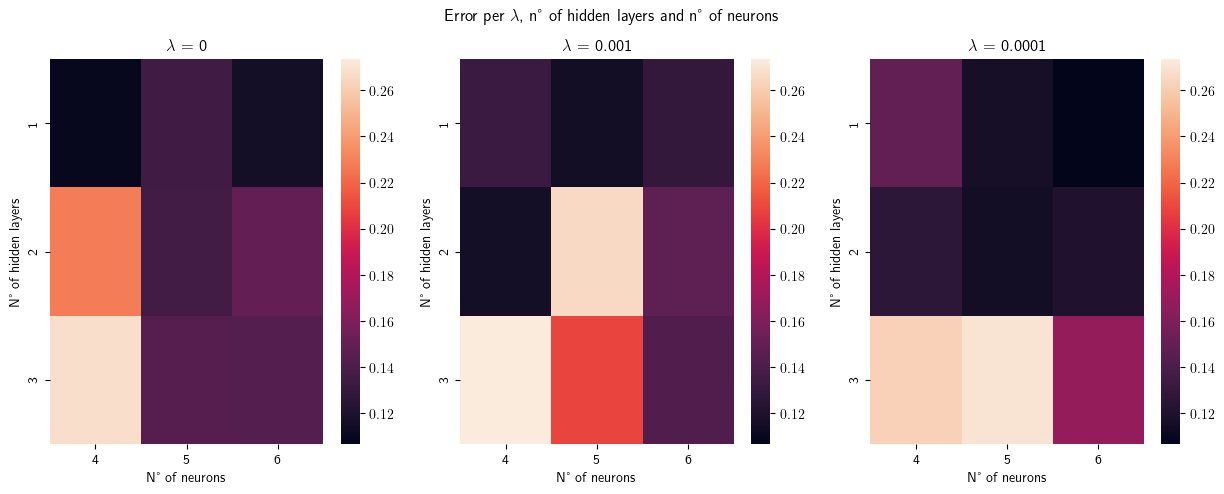

In [123]:
# PLOTANDO OS HEATMAPS

# Habilitando o LaTeX
plt.rcParams['text.usetex'] = True
# Criando os subplots
fig, axes = plt.subplots(1, 3, figsize = (15,5))

# Em cada plot...
for plot in range(3):
    # Plota o heatmap correspondente
    sns.heatmap(final_val_errors[plot], ax = axes[plot], xticklabels = ns_of_neurons, yticklabels = ns_of_hidden_layers, vmin = np.min(np.hstack(final_val_errors)), vmax = np.max(np.hstack(final_val_errors)))
    axes[plot].set_title(f"$\lambda$ = {lbdas[plot]}")
    axes[plot].set_xlabel("N° of neurons")
    axes[plot].set_ylabel("N° of hidden layers")

plt.suptitle("Error per $\lambda$, n° of hidden layers and n° of neurons")

Text(0.5, 0.98, 'Error in time per [$\\lambda$, n° of hidden layers, n° of neurons]')

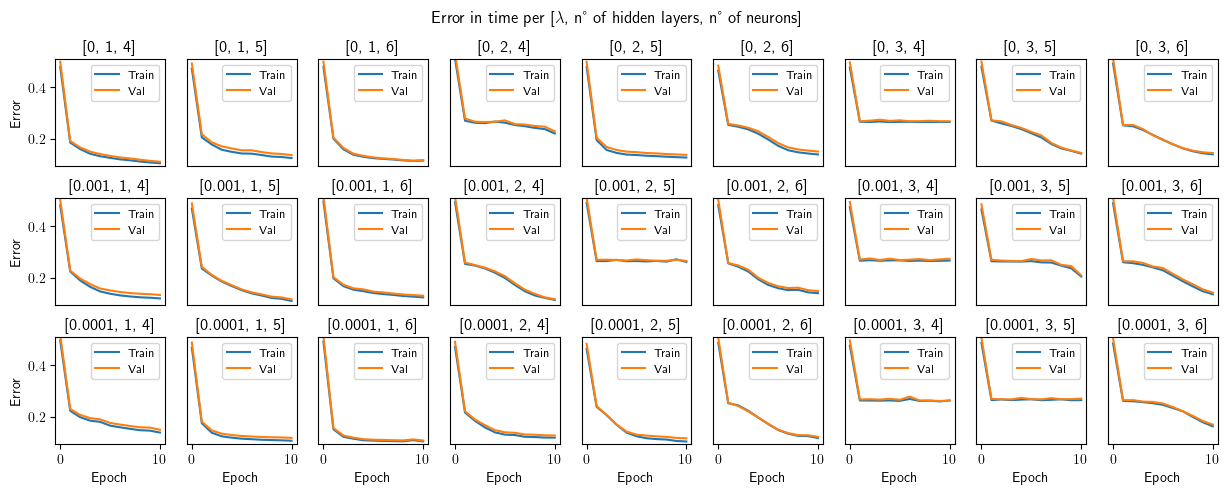

In [124]:
# PLOTANDO OS ERROS AO LONGO DO TREINAMENTO EM CADA CONFIGURAÇÃO

# Criando o subplots
fig, axes = plt.subplots(3, 9, figsize = (15, 5))

# Valores mínimo e máximo do eixo y
ymin = min(min(list) for list in train_errors)
ymax = max(max(list) for list in train_errors)

# Para cada linha...
for i in range(3):
    # Para cada coluna...
    for j in range(9):
        # Plota os erros de treino e de validação correspondentes
        axes[i, j].plot(train_errors[i*9 + j], label = "Train")
        axes[i, j].plot(val_errors[i*9 + j], label = "Val")
        # Configura o título
        axes[i, j].set_title(f"[{lbdas[i]}, {ns_of_hidden_layers[j//3]}, {ns_of_neurons[j%3]}]")
        # Se for a primeira coluna, coloca o rótulo do eixo y
        if j == 0:
            axes[i, j].set_ylabel("Error")
        # Se não, tira os valores do eixo y
        else:
            axes[i, j].set_yticks([])
        # Se for a última linha, coloca o rótulo do eixo x
        if i == 2:
            axes[i, j].set_xlabel("Epoch")
        # Se não, tira os valores do eixo x
        else:
            axes[i, j].set_xticks([])
        # Ajustando os limites do eixo y para que fiquem iguais em todos os gráficos
        axes[i, j].set_ylim(ymin - ymin/10, ymax)
        axes[i, j].legend(fontsize = "small")

# Ajustando o espaço entre as linhas e o título do subplots
plt.subplots_adjust(hspace = 0.3)
plt.suptitle("Error in time per [$\lambda$, n° of hidden layers, n° of neurons]")

In [125]:
# Encontrando o menor dos erros das matrizes calculadas e vendo a quais hiperparâmetros ele corresponde
all_errors = np.hstack(final_val_errors)
best_hyperparameters = np.unravel_index(np.argmin(all_errors), all_errors.shape)

best_lambda = lbdas[int(best_hyperparameters[1]/3)]
best_n_of_hidden_layers = ns_of_hidden_layers[best_hyperparameters[0]]
best_n_of_neurons = ns_of_neurons[best_hyperparameters[1] % 3]

print("Best lambda: ", best_lambda)
print("Best n° of hidden layers: ", best_n_of_hidden_layers)
print("Best n° of neurons: ", best_n_of_neurons)

Best lambda:  0.0001
Best n° of hidden layers:  1
Best n° of neurons:  6


Text(0, 0.5, 'Error')

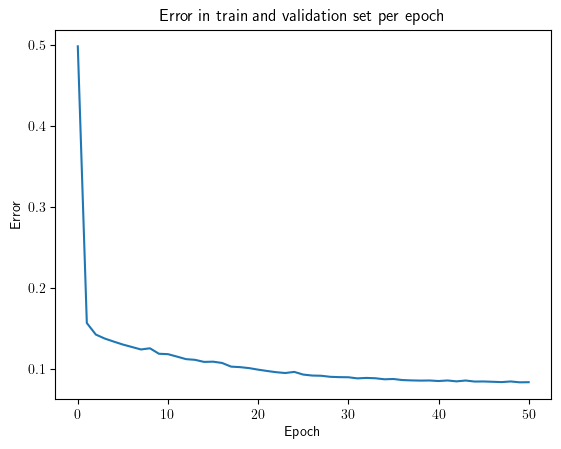

In [126]:
# TREINANDO NOS MELHORES HIPERPARÂMETROS

# Número de datapoints
n_of_datapoints = X_train_and_val.shape[0]

# Lista para armazenar os erros ao longo do treinamento
train_and_val_errors = []

# Inicializa a rede neural
Ws_list = init_regression_neural_network(X_train_and_val.shape[1], best_n_of_hidden_layers, best_n_of_neurons, y_train_and_val.shape[1])

# Calcula o erro no treino e validação e salva na lista
y_train_and_val_pred = regression_forward_pass(X_train_and_val, Ws_list, sigmoid_activation)[0][-1]
train_and_val_errors.append(rmse(y_train_and_val, y_train_and_val_pred))

# Para cada época...
for epoch in range(50):
    # Embaralha os dados
    data_train_and_val = np.hstack((X_train_and_val, y_train_and_val))
    np.random.shuffle(data_train_and_val)
    shuffled_X_train_and_val = data_train_and_val[:, :-2]
    shuffled_y_train_and_val = data_train_and_val[:, -2:]

    # Para cada datapoint...
    for datapoint in range(n_of_datapoints):
        # Avança na rede, calcula os gradientes e atualiza os pesos
        layers_before_activation, activated_layers_with_bias = regression_forward_pass(shuffled_X_train_and_val[datapoint], Ws_list, sigmoid_activation)
        gradients = regression_backpropagation(layers_before_activation, activated_layers_with_bias, Ws_list, shuffled_y_train_and_val[datapoint], sigmoid_derivative, best_lambda)
        Ws_list = update_weights(Ws_list, gradients, 0.01)

    # Calcula o erro no treino e validação e salva na lista
    y_train_and_val_pred = regression_forward_pass(X_train_and_val, Ws_list, sigmoid_activation)[0][-1]
    train_and_val_errors.append(rmse(y_train_and_val, y_train_and_val_pred))

# Plotando o gráfico do erro ao longo do treinamento
plt.plot(range(51), train_and_val_errors)
plt.title("Error in train and validation set per epoch")
plt.xlabel("Epoch")
plt.ylabel("Error")

In [127]:
# Calculando as previsões para o conjunto de teste
y_test_pred = regression_forward_pass(X_test, Ws_list, sigmoid_activation)[0][-1]
# Calculando o erro
test_error = rmse(y_test, y_test_pred)

print("Error in test set: ", test_error)

Error in test set:  0.08347933036158689


# Classification

**Download the data from ECLASS**
- drug_side_effects.csv
- drug_features.csv

**Dataset description:**

In this exercise, you will build and train a neural network to predict the occurrence of drug side effects. The dataset is derived from the SIDER dataset, containing relatively common side effects that can occur for at least 50 drugs. This produces a total of 740 drugs and 256 side effects. The features represent various molecular properties, including molecular weight, number of atoms, number of rings, number of hydrogen bond donors and acceptors, logP, topological polar surface area (TPSA), number of rotatable bonds, number of aromatic rings, number of aliphatic rings, number of saturated rings, and number of heteroatoms. 

**Remember that each drug can cause many side effects, not only one.** 

*Feel free to explore the dataset and check the potential side effects of popular medications!*

### To complete this exercise, follow these steps:

1. Load the dataset and split it into training, validation, and test sets, using an 80:10:10 ratio. 

2. Standardize the features by removing the mean and scaling to unit variance. To do this, perform the following for each feature (column) in the dataset:
    - Calculate the mean and standard deviation across the training set for that feature.
    - Subtract the mean from each value in that feature and divide by the standard deviation.
    - Apply the same transformation to the validation and test sets using the mean and standard deviation calculated from the training set.

**Observation:** you need to code this part, you’re not allowed to use scikit-learn.

*Normalization of features is important for neural networks because:*
- *It ensures that all features have the same scale, preventing certain features from dominating the learning process due to their larger magnitude.*
- *It improves the numerical stability of the training process, making the neural network less sensitive to the choice of learning rate and other hyperparameters.*

3. Build a neural network using NumPy that takes in the features as input and predicts the occurrence of side effects. You will choose the number of neurons per layer and the number of layers. You will provide this information as an input list where the length of the list determines the number of hidden layers, and each element is the number of neurons of that hidden layer. For example, an array `layers = [64,128,256]` should produce a network with 4 layers, with 3 hidden layers with 64, 128, and 256 neurons each. For the hidden layers use the sigmoid activation function. You will need to regularize your neural network using weight decay, that is, you will include a regularization term in your error function.

4. Code the forward pass and backpropagation algorithm to learn the weights of the neural network. Use the training set to train the neural network and update the weights using stochastic gradient descent. Don’t forget about the biases. 

5. Monitor the training by plotting the training and validation losses across the epochs.

	**Observation:** make sure the loss goes down during training, acceptable values are within 0.2 – 2.8 approximately. These values depend on the choice of the different hyperparameters. Test only sensible values taking into account the dataset, i.e., number of features, drugs, side effects. 

The performance of your neural network will be different depending on the number of layers, number of neurons per layer and the value of λ that controls the amount of weight decay. You will experiment with 3 values of λ: 0 (no weight decay), 1 and 0.01.
To choose the best network configuration and assess its performance you will:

1. For each value of λ, select 3 different layer configurations (note that in this exercise, the number of neurons per layer does not require to be the same for each layer).
2. Calculate the loss for each configuration on the validation set.
3. At the end of this process, you should be left with 9 loss values (one for each configuration). Train your final model selecting the best combination of hyper-parameters and evaluate the final performance of the neural network using the test set and the Area Under the ROC Curve (AUROC) with the function provided in the Jupyter notebook. 
	
	*Observation: don’t expect impressive AUROC values, as this is a highly complex problem that can’t be solved easily with a simple neural network with standard features. Expect values in the range (0.55-0.75).*

**Important:**
- Train for 50 epochs.
- Set the learning rate η to 0.01.



In [5]:
## your code goes here: 

# PREPARANDO OS DADOS

# Carregando os dados
data_features = pd.read_csv("drug_features.csv").to_numpy()[:, 1:]
data_side_effects = pd.read_csv("drug_side_effects.csv").to_numpy()[:, 1:]

# Separando os dados
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(data_features, data_side_effects, test_size = 0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, test_size = 1/9)

In [6]:
# NORMALIZANDO AS FEATURES

# Calculando as médias e os desvios padrão
means = np.mean(X_train, axis = 0)
stds = np.std(np.float64(X_train), axis = 0)

# Subtraindo as médias e dividindo pelos desvios padrão
X_train = (X_train - means) / stds
X_train_and_val = (X_train_and_val - means) / stds
X_val = (X_val - means) / stds
X_test = (X_test - means) / stds

In [7]:
# FUNÇÕES PARA A REDE NEURAL DE CLASSIFICAÇÃO


# Função da entropia cruzada
def cross_entropy(y_true, y_pred, Ws_list = []):
    # Calculando o erro base
    error = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    # Se for passada a lista de pesos...
    if Ws_list:
        # Inicializa o erro da parte da regularização
        weights_error = 0
        # Para cada matriz de pesos...
        for W in Ws_list:
            # Soma ao erro a soma dos quadrados dos pesos
            weights_error += np.sum(W**2)
        # Retorna a soma do erro base com o termo de regularização
        return error + weights_error
    # Se não, retorna apenas o erro base
    else:
        return error


# Função para inicializar a rede neural, retornando suas matrizes de pesos
def init_classification_neural_network(dim_input, ns_of_neurons, dim_output):

    # Lista para armazenar as matrizes de pesos
    weight_matrices = []

    # Criando uma cópia da lista
    all_ns_of_neurons = ns_of_neurons.copy()

    # Criando uma única lista com todos os números de neurônios
    all_ns_of_neurons.insert(0, dim_input)
    all_ns_of_neurons.append(dim_output)

    # Para cada camada antes da última...
    for i in range(len(all_ns_of_neurons) - 2):
        # Cria a matriz de pesos com as dimensões correspondentes
        current_W = np.random.normal(0, 1, (all_ns_of_neurons[i] + 1, all_ns_of_neurons[i + 1]))
        # Adiciona-a na lista
        weight_matrices.append(current_W)

    # Cria a matriz de pesos da última camada
    current_W = np.random.normal(0, 0.01, (all_ns_of_neurons[-2] + 1, all_ns_of_neurons[-1]))
    # Adiciona-a na lista
    weight_matrices.append(current_W)

    return weight_matrices


# Função do forward pass para classificação
def classification_forward_pass(X, Ws_list, activation):
    
    # Lista para armazenar as camadas antes das ativações
    layers_before_activation = []
    # Lista para armazenar as camadas após as ativações e com o bias já inserido
    activated_layers_with_bias = []

    # Camada atual de entrada na matriz de pesos
    current_input_layer = X
    
    # Para cada matriz de pesos...
    for W in Ws_list:
        # Adiciona a coluna do bias à camada de entrada
        if np.ndim(current_input_layer) == 1:
            current_input_layer = np.insert(current_input_layer, 0, 1)
        else:
            current_input_layer = np.insert(current_input_layer, 0, 1, axis = 1)

        # Adiciona essa camada à lista de camadas ativadas com bias
        activated_layers_with_bias.append(current_input_layer)

        # Calcula a saída dessa iteração
        current_output_layer = current_input_layer @ W
        # Adiciona ele na lista de camadas antes da ativação
        layers_before_activation.append(current_output_layer)

        # Ativando essa camada e setando ela como a nova camada de input
        activated_current_output_layer = activation(current_output_layer)
        current_input_layer = activated_current_output_layer

    # A previsão é a última camada ativada
    y_pred = activated_current_output_layer

    return layers_before_activation, activated_layers_with_bias, y_pred


# Função do backpropagation para classificação
def classification_backpropagation(layers_before_activation, activated_layers_with_bias, y_pred, Ws_list, y_true, activation_derivative, lbda):

    # Lista para armazenar os gradientes
    gradients = []

    # Calculando os gradientes dos pesos da última camada
    delta = (y_pred - y_true).reshape((1, -1))
    W_output_gradient = (activated_layers_with_bias[-1].reshape((-1, 1)) @ delta) + lbda*Ws_list[-1]
    # Adicionando-o na lista de gradientes
    gradients.append(W_output_gradient)

    # Para cada matriz de pesos antes da última...
    for i in range(len(Ws_list) - 2, -1, -1):
        # Calcula o delta da camada atual com base no delta da camada seguinte
        delta = activation_derivative(layers_before_activation[i]) * (delta.reshape((1, -1)) @ Ws_list[i + 1][1:, :].T)
        # Calcula seu gradiente
        gradient = activated_layers_with_bias[i].reshape((-1, 1)) @ delta + lbda*Ws_list[i]
        # Adiciona-o na lista de gradientes
        gradients.append(gradient)

    # Invertendo a ordem da lista para ficar correspondente com a de pesos
    gradients.reverse()
    
    return gradients


# Função de atualização dos pesos
def update_weights(Ws_list, gradients, lr):
    # Para cada matriz de pesos...
    for i in range(len(Ws_list)):
        # Atualiza os pesos com base no seu gradiente
        Ws_list[i] -= lr*np.float64(gradients[i])

    return Ws_list

In [8]:
# Lista com as configurações de camadas a serem testadas
layers_tests = [[64, 128], [32, 64, 128], [16, 32, 64, 128]]
# layers_tests = [[64, 128]]
# Lista com os valores de lambda a serem testados
lbdas = [0, 0.01, 1]

# Listas para armazenar os erros no treino e na validação ao longo do aprendizado
train_errors = []
val_errors = []
# Lista para armazenar apenas o erro final na validação de cada modelo
final_val_errors = []

# Número de dados
n_of_datapoints = X_train.shape[0]

# Para cada lambda...
for lbda in lbdas:
    # Para cada configuração de camadas...
    for layers_test in layers_tests:
        # Inicializa listas para armazenarem os erros ao longo do aprendizado
        current_train_errors = []
        current_val_errors = []

        # Inicializa a rede neural
        Ws_list = init_classification_neural_network(X_train.shape[1], layers_test, y_train.shape[1])
        
        # Calcula o erro no treino e salva na lista
        y_train_pred = classification_forward_pass(X_train, Ws_list, sigmoid_activation)[2]
        current_train_errors.append(cross_entropy(y_train, y_train_pred))

        # Calcula o erro na validação e salva na lista
        y_val_pred = classification_forward_pass(X_val, Ws_list, sigmoid_activation)[2]
        current_val_error = cross_entropy(y_val, y_val_pred)
        current_val_errors.append(current_val_error)

        # Para cada época...
        for epoch in range(10):
            # Embaralha os dados
            data_train = np.hstack((X_train, y_train))
            np.random.shuffle(data_train)
            shuffled_X_train = data_train[:, :X_train.shape[1]]
            shuffled_y_train = data_train[:, X_train.shape[1]:]

            # Para cada datapoint...
            for datapoint in range(n_of_datapoints):
                # Avança na rede, calcula os gradientes e atualiza os pesos
                layers_before_activation, activated_layers_with_bias, y_pred = classification_forward_pass(shuffled_X_train[datapoint], Ws_list, sigmoid_activation)
                gradients = classification_backpropagation(layers_before_activation, activated_layers_with_bias, y_pred, Ws_list, shuffled_y_train[datapoint], sigmoid_derivative, lbda)
                Ws_list = update_weights(Ws_list, gradients, 0.01)

            # Calcula o erro no treino e salva na lista
            y_train_pred = classification_forward_pass(X_train, Ws_list, sigmoid_activation)[2]
            current_train_errors.append(cross_entropy(y_train, y_train_pred))

            # Calcula o erro na validação e salva na lista
            y_val_pred = classification_forward_pass(X_val, Ws_list, sigmoid_activation)[2]
            current_val_error = cross_entropy(y_val, y_val_pred)
            current_val_errors.append(current_val_error)

        # Salva as listas de erros ao longo do tempo nas respectivas listas
        train_errors.append(current_train_errors)
        val_errors.append(current_val_errors)

        # Salva o erro final na lista correspondente
        final_val_errors.append(current_val_error)

Text(0.5, 0.98, 'Error in time per [$\\lambda$, layers setting]')

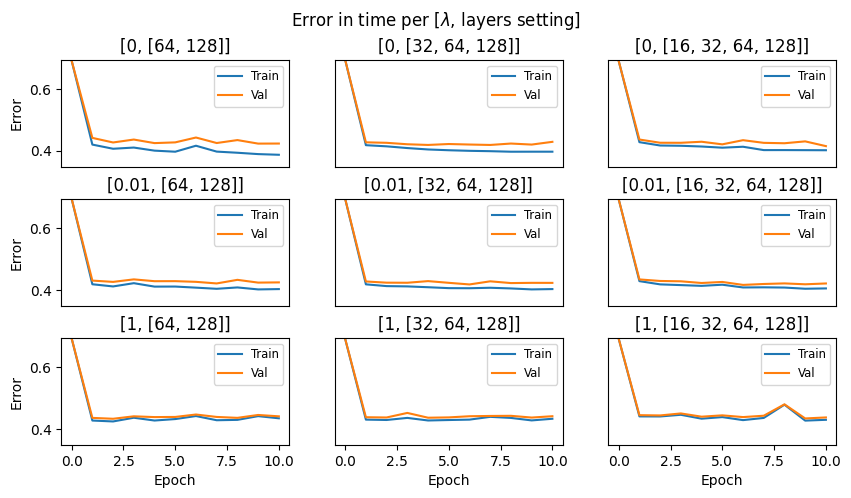

In [9]:
# PLOTANDO OS ERROS AO LONGO DO TREINAMENTO EM CADA CONFIGURAÇÃO

# Criando o subplots
fig, axes = plt.subplots(3, 3, figsize = (10, 5))

# Valores mínimo e máximo do eixo y
ymin = min(min(list) for list in train_errors)
ymax = max(max(list) for list in train_errors)

# Para cada linha...
for i in range(3):
    # Para cada coluna...
    for j in range(3):
        # Plota os erros de treino e de validação
        axes[i, j].plot(train_errors[i*3 + j], label = "Train")
        axes[i, j].plot(val_errors[i*3 + j], label = "Val")
        # Ajusta o título
        axes[i, j].set_title(f"[{lbdas[i]}, {layers_tests[j]}]")
        # Se for a primeira coluna, coloca o rótulo do eixo y
        if j == 0:
            axes[i, j].set_ylabel("Error")
        # Se não, tira os valores do eixo y
        else:
            axes[i, j].set_yticks([])
        # Se for a última linha, coloca o rótulo do eixo x
        if i == 2:
            axes[i, j].set_xlabel("Epoch")
        # Se não, tira os valores do eixo x
        else:
            axes[i, j].set_xticks([])
        # Ajustando os limites do eixo y para todos os gráficos ficarem iguais
        axes[i, j].set_ylim(ymin - ymin/10, ymax)
        # Colocando a legenda
        axes[i, j].legend(fontsize = "small")

# Ajustando o espaço entre as linhas e o título do subplots
plt.subplots_adjust(hspace = 0.3)
plt.suptitle("Error in time per [$\lambda$, layers setting]")

In [10]:
# Pegando o melhor modelo
best_model_coord = np.argmin(final_val_errors)
best_lambda = lbdas[best_model_coord//3]
best_layers_setting = layers_tests[best_model_coord % 3]

print("Best lambda: ", best_lambda)
print("Best settings: ", best_layers_setting)

Best lambda:  0
Best settings:  [16, 32, 64, 128]


In [11]:
# TREINANDO COM OS MELHORES PARÂMETROS

# Listas para armazenar os erros no conjunto de treino e validação
train_and_val_errors = []

# Número de dados
n_of_datapoints = X_train_and_val.shape[0]

# Inicializa a rede neural
Ws_list = init_classification_neural_network(X_train_and_val.shape[1], best_layers_setting, y_train_and_val.shape[1])

# Calcula o erro no treino e validação e salva na lista
y_train_and_val_pred = classification_forward_pass(X_train_and_val, Ws_list, sigmoid_activation)[2]
train_and_val_errors.append(cross_entropy(y_train_and_val, y_train_and_val_pred))

# Para cada época...
for epoch in range(50):
    # Embaralha os dados
    data_train = np.hstack((X_train_and_val, y_train_and_val))
    np.random.shuffle(data_train)
    shuffled_X_train_and_val = data_train[:, :X_train_and_val.shape[1]]
    shuffled_y_train_and_val = data_train[:, X_train_and_val.shape[1]:]

    # Para cada datapoint...
    for datapoint in range(n_of_datapoints):
        # Avança na rede, calcula os gradientes e atualiza os pesos
        layers_before_activation, activated_layers_with_bias, y_pred = classification_forward_pass(shuffled_X_train_and_val[datapoint], Ws_list, sigmoid_activation)
        gradients = classification_backpropagation(layers_before_activation, activated_layers_with_bias, y_pred, Ws_list, shuffled_y_train_and_val[datapoint], sigmoid_derivative, best_lambda)
        Ws_list = update_weights(Ws_list, gradients, 0.01)

    # Calcula o erro no treino e validação e salva na lista
    y_train_and_val_pred = classification_forward_pass(X_train_and_val, Ws_list, sigmoid_activation)[2]
    train_and_val_errors.append(cross_entropy(y_train_and_val, y_train_and_val_pred))

Text(0, 0.5, 'Error')

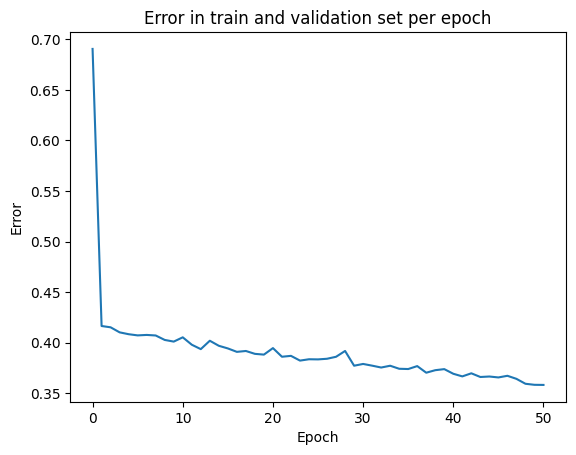

In [12]:
# Plotando o gráfico do erro ao longo do treinamento
plt.plot(range(51), train_and_val_errors)
plt.title("Error in train and validation set per epoch")
plt.xlabel("Epoch")
plt.ylabel("Error")

In [13]:
## to calculate the test set AUROC use the following code:

# Calculando a previsão para o conjunto de teste
y_test_pred = classification_forward_pass(X_test, Ws_list, sigmoid_activation)[2]

# Calculando a AUROC
auroc = roc_auc_score(np.float64(y_test), y_test_pred)
print("AUC: ", auroc)

AUC:  0.5882093886959325
